# Machine learning example - regression

## Machine learning framework: Scikit-learn

One of the most popular machine learning libraries in python is scikit-learn. 

The package has most of the models one can come across in statistical textbooks. The model training implementation and making predictions are written by a team of top notch programmers and mathematicians. If they make a mistake somewhere in their code, alot of people voice their opinions on the internet thus this package is tested daily by thousands of users. 

In this notebook and in the book throughout, I will use the scikit-learn for datasets and model training. 

Please visit the official website and support them: https://scikit-learn.org/stable/ 

## Loading packages 

In [166]:
# Machine learning model - logistic regression 
from sklearn.linear_model import LinearRegression

# Data wrangling 
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt 

# Model saving 
import pickle

# Array math 
import numpy as np 

## Problem to solve 

Before diving deeper into ML concepts, we first need to define what are we trying to predict. 

In this notebook we will try to predict house prices in the Boston are given a set of explanatory variables.

Lets import an example of tidy data from the scikit learn datasets regarding Boston are house prices. The dataset provides a very in depth definition of all the collumns. 

In [145]:
from sklearn.datasets import load_boston

# Loading the data object
data = load_boston()

# Printing out column definitions
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Experience 

Experience in machine learning models is tidy data.

Loading the data:

In [18]:
# Extracting features for house prices
d = pd.DataFrame(data['data']) 

# Adding column names 
d.columns = data['feature_names']

# Adding the target variable 
d['Y'] = data['target']

In [25]:
d

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Lets remember the definiton stated previously about tidy data: 
    
**"Each variable is a column, each observation is a row, and each type of observational unit is a table"**

As we can see, when creating this dataset, the researches created a separate row for every observation of a different house price (Y collumn). Along with the price, other variables that can be used in explaining the price are tracked as well. Each collumn is a different variable. 

Lastly, an observation unit, sometimes also called statistical unit, is the entity on which information is received and statistics are compiled in the process of collecting statistical data. We have only one entity here - house price and we have one table for that.  

Thus, every box for tidy data is checked! 

This data is the experience needed for machine learning algorithm to start learning. 

## Task

The task was briefly formulated in the introduction - to create a machine learning model to predict the house prices. 

To be more precise, we are trying to create a function **f** that given a set of inputs, outputs the most accurate house price: 

$$ f(x_{1}, x_{2}, ..., x_{13}) = \widehat{Y} $$

The widehat $\widehat{}$ notation ussualy means predictions. Thus the $\widehat{Y}$ reffers to the predicted price of the machine learning model. 

As a software developer reading this, you can view the function $f$ as an API that needs to receive the same features that it was built on and it outputs a house price.  

## Performance metric 

Depending on the task, various metrics to inspect the performance of the predictor function are available. When trying to forecast a variable that is continuous (it can have any real number value) two of the most popular metrics are **mean squared error** (**mse** for short): 

$$mse(y, \widehat{y}) = \dfrac{1}{n} \Sigma_{i}^{n}\left(y_{i} - \widehat{y_{i}} \right)^{2}$$

And **mean absolute error (mae)**: 

$$mae(y, \widehat{y}) = \dfrac{1}{n} \Sigma_{i}^{n}\left|y_{i} - \widehat{y_{i}} \right|$$

The lower the value of these metrics, the closer the predictions are to the actual values. 

In [102]:
# Importing the MSE metric from scikit-learn 
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Letting the model learn 

### Train and test sets

In order to evaluate if the machine learning model is training we need to test it out in a dataset that is not seen during training time. 

In [140]:
# Getting 25% random rows for the test set 
test = d.sample(frac=0.25, random_state=10)

# Leaving the rest of the rows to training
train = d[~d.index.isin(test.index)]

# Reseting the index on each of the sets 
test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

# Printing the shapes of the data 
print(f"Test number of rows: {test.shape[0]}")
print(f"Train number of rows: {train.shape[0]}")

Test number of rows: 126
Train number of rows: 380


### Inspecting performance

Lets subset the training data more and see how the performance metric increases when we add more and more data for the model.  

In [141]:
# Fractions of data
fracs = [0.1, 0.25,  0.5, 1]

# Placeholder for mae 
maes = []

# Placeholder for number of observations
nobs = []

for frac in fracs:
    # Getting the training subset
    train_subset = train.sample(frac=frac, random_state=1)
    
    # Saving the number of observations
    nobs.append(train_subset.shape[0])
    
    # Droping the dependant variable 
    X = train_subset.drop("Y", axis=1)
    
    # Extracting the dependant variable
    Y = train_subset['Y']
    
    # Initiating the model 
    lm = LinearRegression()
    
    # Fiting the model 
    lm.fit(X, Y)
    
    # Making the predictions 
    yhat = lm.predict(test[X.columns])
    
    # Calculating the MSE 
    mae = mean_absolute_error(test['Y'].tolist(), yhat)
    
    # Appending to master results 
    maes.append(mae)

In [142]:
# Converting the number of obs to str 
nobs = [str(x) for x in nobs]

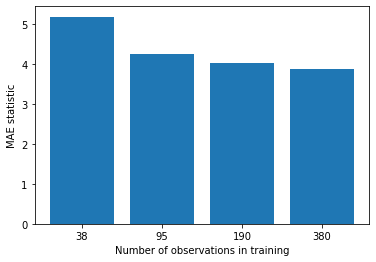

In [143]:
plt.bar(nobs, maes)
plt.ylabel('MAE statistic')
plt.xlabel("Number of observations in training")
plt.show()

The graph above shows that when increasing the number of observations, the mae statistic get lower, meaning, the performance *increases*.

## Interpretation 

When we used the full training observations to create the model, on the test set, on average, the mae statistic was 3.8. This means that our model made an error of 3.8 thousand dollars for the median price of the house.  

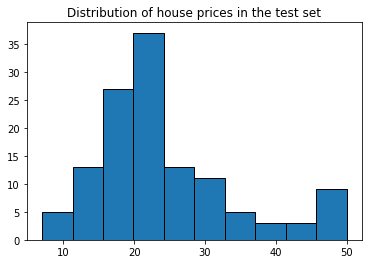

In [151]:
plt.hist(test['Y'], edgecolor='black')
plt.title("Distribution of house prices in the test set")
plt.show()

In [154]:
test['Y'].describe()

count    126.000000
mean      24.426190
std        9.992599
min        7.000000
25%       18.350000
50%       22.650000
75%       28.175000
max       50.000000
Name: Y, dtype: float64

The mean value is about 24 thousand dollars so in my opinion the model did a pretty good job in forecasting the value of a house. 

## Creating the model object for API

Now that we inspected the model results on the test set and see that the collumns provided help in forecasting the price of the house, lets create a model object which we can use in an API to serve to the world.

In [157]:
# Creating the model on full data 
lm = LinearRegression()

lm.fit(d.drop("Y", axis=1), d['Y'])

# Saving to a .sav object which can be loaded in any python environment
pickle.dump(lm, open("linear_regression.sav", 'wb'))

We can load the model and see if it predicts the save as the created model

In [159]:
saved_model = pickle.load(open('linear_regression.sav', 'rb'))

In [168]:
# Predicting 
yhat1 = lm.predict(train.drop('Y', axis=1))
yhat2 = saved_model.predict(train.drop('Y', axis=1))

# Asserting if each coordinate is equal 
is_equal = [x == yhat2[i] for i, x in enumerate(yhat1)]

# Will return True if all the entries are TRUE
np.all(is_equal)

True

## Next chapter - Classification 

In the next chapter I will create a model for a classification problem. The target variable there is not a continues one but discrete - it has a fixed number of outcomes (is the picture "dog" or "cat"; is the user "happy", "sad" or "neutral"; etc.)